In [4]:
import pandas as pd
df = pd.read_csv("C:\\Desktop\\ml\\spam.csv", encoding='ISO-8859-1')

In [11]:
df.head()
df.columns

Index(['v1', 'v2'], dtype='object')

In [12]:
df.shape

(5572, 2)

In [14]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [18]:
df.v1.value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [19]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [20]:
df['spam'] = df['v1'].apply(lambda x:1 if x=='spam' else 0)# 1 denote spam has been done 

In [23]:
df=df.drop(['v1'],axis='columns')
df.head()

,v2,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


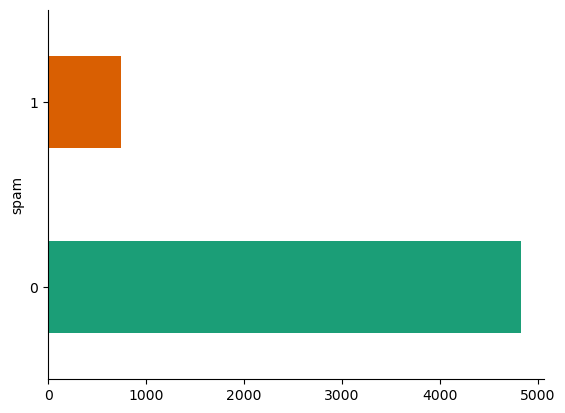

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('spam').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


In [26]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train ,y_test =train_test_split(df.v2,df.spam ,test_size=0.2)


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_count = v.fit_transform(x_train.values)
x_train_count.toarray()[:]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [28]:
from sklearn.naive_bayes import MultinomialNB 
model = MultinomialNB()
model.fit(x_train_count,y_train)

MultinomialNB()

In [30]:
x_test_count = v.transform(x_test)
model.score(x_test_count,y_test)

0.9847533632286996

In [31]:
from sklearn.pipeline import Pipeline
clf =Pipeline([
      ('vectorizer',CountVectorizer()),
      ('nb',MultinomialNB())
])

In [32]:
clf.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [34]:
y_clf=clf.predict(x_test)
clf.score(x_test,y_test)

0.9847533632286996

In [57]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_clf)
cm1

array([[952,   3],
       [ 14, 146]], dtype=int64)

Text(58.222222222222214, 0.5, 'trutht')

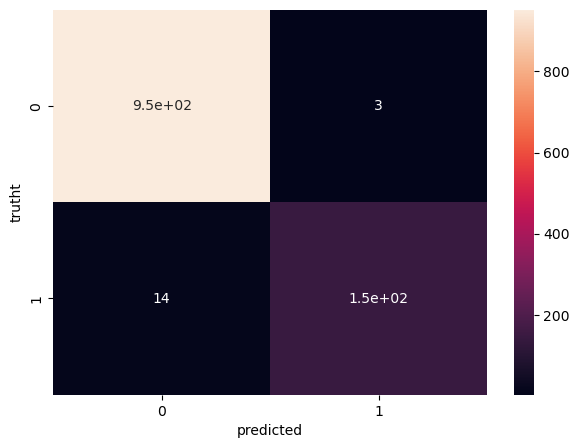

In [58]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm1,annot=True)
plt.xlabel('predicted')
plt.ylabel('trutht')

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clr =Pipeline([
      ('vectorizer',CountVectorizer()),
      ('classifier',LogisticRegression())
])

In [43]:
clr.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', LogisticRegression())])

In [44]:
y_clr=clr.predict(x_test)
clr.score(x_test,y_test)

0.9766816143497757

In [59]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_clr)
cm2

array([[954,   1],
       [ 25, 135]], dtype=int64)

Text(33.22222222222222, 0.5, 'trutht')

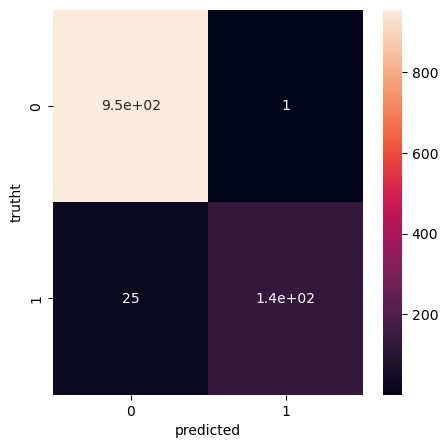

In [60]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm2,annot=True)
plt.xlabel('predicted')
plt.ylabel('trutht')

In [45]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
cls =Pipeline([
      ('vectorizer',CountVectorizer()),
      ('svc',SVC())
])

In [46]:
cls.fit(x_train,y_train)
y_cls=cls.predict(x_test)
cls.score(x_test,y_test)

0.9730941704035875

In [61]:
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,y_cls)
cm3

array([[954,   1],
       [ 29, 131]], dtype=int64)

Text(33.22222222222222, 0.5, 'trutht')

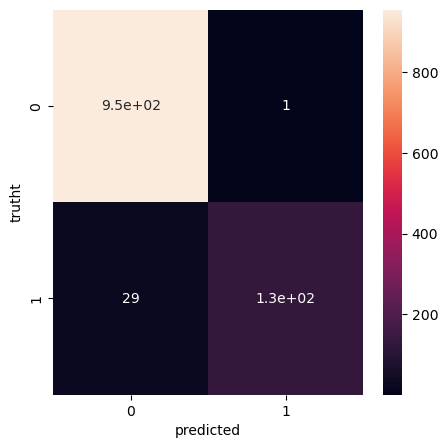

In [62]:
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm3,annot=True)
plt.xlabel('predicted')
plt.ylabel('trutht')

In [72]:
from sklearn.metrics import classification_report
from tabulate import tabulate
report_dict = classification_report(y_test, y_clf, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print("This is clsssifsction repot of Multinomial NB :")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

This is clsssifsction repot of Multinomial NB :
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.9855072463768116 | 0.9968586387434555 | 0.9911504424778761 |       955.0        |
|      1       | 0.9798657718120806 |       0.9125       | 0.9449838187702266 |       160.0        |
|   accuracy   | 0.9847533632286996 | 0.9847533632286996 | 0.9847533632286996 | 0.9847533632286996 |
|  macro avg   | 0.9826865090944461 | 0.9546793193717278 | 0.9680671306240514 |       1115.0       |
| weighted avg | 0.9846977074258187 | 0.9847533632286996 | 0.9845256354884375 |       1115.0       |
+--------------+--------------------+--------------------+--------------------+--------------------+


In [73]:
from sklearn.metrics import classification_report
from tabulate import tabulate
report_dict = classification_report(y_test, y_clr, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print("This is clsssifsction repot of Logistic regression :")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

This is clsssifsction repot of Logistic regression :
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.9744637385086823 | 0.9989528795811519 | 0.9865563598759048 |       955.0        |
|      1       | 0.9926470588235294 |      0.84375       | 0.9121621621621622 |       160.0        |
|   accuracy   | 0.9766816143497757 | 0.9766816143497757 | 0.9766816143497757 | 0.9766816143497757 |
|  macro avg   | 0.9835553986661059 | 0.921351439790576  | 0.9493592610190336 |       1115.0       |
| weighted avg | 0.9770730042040864 | 0.9766816143497757 | 0.9758809593071166 |       1115.0       |
+--------------+--------------------+--------------------+--------------------+--------------------+


In [74]:
from sklearn.metrics import classification_report
from tabulate import tabulate
report_dict = classification_report(y_test, y_cls, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
print("This is clsssifsction repot of svm :")
print(tabulate(report_df, headers='keys', tablefmt='pretty'))

This is clsssifsction repot of svm :
+--------------+--------------------+--------------------+--------------------+--------------------+
|              |     precision      |       recall       |      f1-score      |      support       |
+--------------+--------------------+--------------------+--------------------+--------------------+
|      0       | 0.970498474059003  | 0.9989528795811519 | 0.9845201238390093 |       955.0        |
|      1       | 0.9924242424242424 |      0.81875       | 0.8972602739726028 |       160.0        |
|   accuracy   | 0.9730941704035875 | 0.9730941704035875 | 0.9730941704035875 | 0.9730941704035875 |
|  macro avg   | 0.9814613582416227 | 0.9088514397905759 | 0.940890198905806  |       1115.0       |
| weighted avg | 0.9736447726584992 | 0.9730941704035875 | 0.9719985310330674 |       1115.0       |
+--------------+--------------------+--------------------+--------------------+--------------------+
